In [1]:
# HIDDEN
import matplotlib
matplotlib.use('Agg')
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plt.style.use('fivethirtyeight')

### Chronic kidney disease

We're going to work with a data set that was collected to help doctors diagnose chronic kidney disease (CKD).  Each row in the data set represents a single patient who was treated in the past and whose diagnosis is known.  For each patient, we have a bunch of measurements from a blood test.  

In [2]:
ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.show(3)

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1


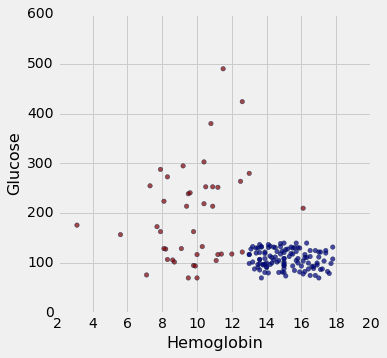

In [3]:
ckd.scatter('Hemoglobin', 'Glucose', c=ckd.column('Class'))

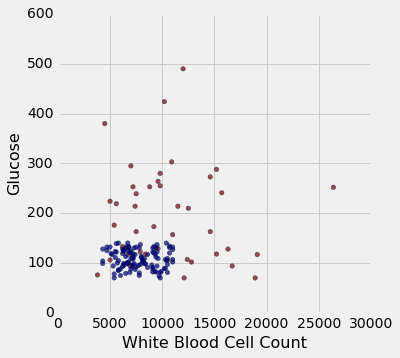

In [4]:
ckd.scatter('White Blood Cell Count', 'Glucose', c=ckd.column('Class'))

### Decision boundary

For each scatter plot above, how would you draw the boundary between regions recognized as class 0 and class 1?

### Banknote authentication

Predicting whether a banknote (e.g., a \$20 bill) is counterfeit or legitimate.  Researchers have put together a data set for us, based on photographs of many individual banknotes: some counterfeit, some legitimate. 

In [5]:
banknotes = Table.read_table('banknote.csv')
banknotes

WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
0.32924,-4.4552,4.5718,-0.9888,0
4.3684,9.6718,-3.9606,-3.1625,0
3.5912,3.0129,0.72888,0.56421,0
2.0922,-6.81,8.4636,-0.60216,0
3.2032,5.7588,-0.75345,-0.61251,0
1.5356,9.1772,-2.2718,-0.73535,0


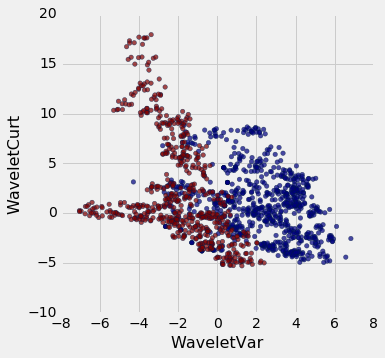

In [6]:
banknotes.scatter('WaveletVar', 'WaveletCurt', c=banknotes.column('Class'))

Suppose we used $k=11$.  What parts of the plot would the classifier get right, and what parts would it make errors on?  What would the decision boundary look like?

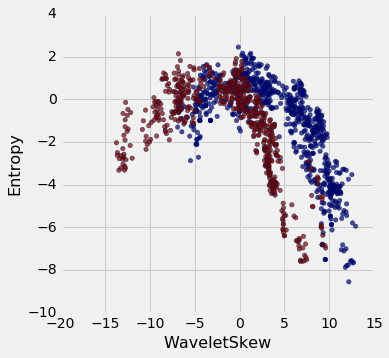

In [7]:
banknotes.scatter('WaveletSkew', 'Entropy', c=banknotes.column('Class'))

### Multiple attributes

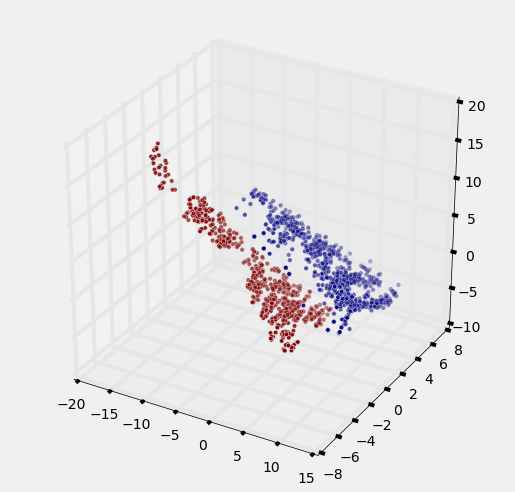

In [8]:
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(banknotes.column('WaveletSkew'), 
           banknotes.column('WaveletVar'), 
           banknotes.column('WaveletCurt'), 
           c=banknotes.column('Class'))

### Accuracy

How would you summarize the accuracy of a classifier for a dataset?

## Breast cancer diagnosis

Brittany Wenger won the Google national science fair three years ago as a 17-year old high school student.  Here's Brittany:

![Brittany Wenger](http://i.huffpost.com/gen/701499/thumbs/o-GSF83-570.jpg?3)

Brittany's science fair project was to build a classification algorithm to diagnose breast cancer.  She won grand prize for building an algorithm whose accuracy was almost 99%. 

Let's see how well we can do, with the ideas we've learned in this course.

So, let me tell you a little bit about the data set.  Basically, if a woman has a lump in her breast, the doctors may want to take a biopsy to see if it is cancerous.  There are several different procedures for doing that.  Brittany focused on fine needle aspiration (FNA), because it is less invasive than the alternatives.  The doctor gets a sample of the mass, puts it under a microscope, takes a picture, and a trained lab tech analyzes the picture to determine whether it is cancer or not.  We get a picture like one of the following:

![benign](https://lh5.googleusercontent.com/sYFBBiw6XB2uEkQBTLCDqQvfi1vzId7q-EFvGIkeEqgaq-c7Q7HEaT5tdUIM8rU7l5-a9E_8gZzqDhnFEu7xV8MnXAeez41Ckq9DN0wO_S8nEY0rqek)

![cancer](https://lh5.googleusercontent.com/OpQSE0LmsWmYTahY3XAwb0RTPUluMhwT_FEbKhF7OU27iVxHk6on9VTruCW2loeks6HICe3Chjg4zXZxp9ko0rQhC3X_QeThTZFyaQc87RTZaGzoc7Y)

Unfortunately, distinguishing between benign vs malignant can be tricky.  So, researchers have studied using machine learning to help with this task.  The idea is that we'll ask the lab tech to analyze the image and compute various attributes: things like the typical size of a cell, how much variation there is among the cell sizes, and so on.  Then, we'll try to use this information to predict (classify) whether the sample is malignant or not.  We have a training set of past samples from women where the correct diagnosis is known, and we'll hope that our machine learning algorithm can use those to learn how to predict the diagnosis for future samples.

We end up with the following data set.  For the "Class" column, 1 means malignant (cancer); 0 means benign (not cancer).

In [9]:
patients = Table.read_table('breast-cancer.csv').drop('ID')
patients

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
5,1,1,1,2,1,3,1,1,0
5,4,4,5,7,10,3,2,1,0
3,1,1,1,2,2,3,1,1,0
6,8,8,1,3,4,3,7,1,0
4,1,1,3,2,1,3,1,1,0
8,10,10,8,7,10,9,7,1,1
1,1,1,1,2,10,3,1,1,0
2,1,2,1,2,1,3,1,1,0
2,1,1,1,2,1,1,1,5,0
4,2,1,1,2,1,2,1,1,0


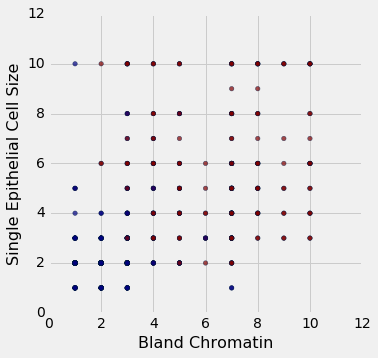

In [10]:
patients.scatter('Bland Chromatin', 'Single Epithelial Cell Size', c=patients['Class'])

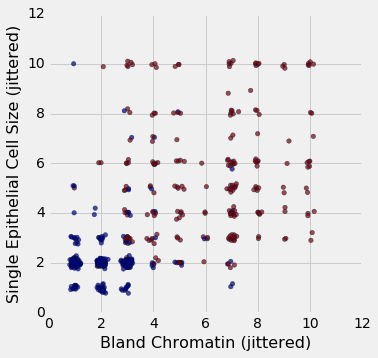

In [11]:
def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))
Table().with_columns([
        'Bland Chromatin (jittered)', 
        randomize_column(patients.column('Bland Chromatin')),
        'Single Epithelial Cell Size (jittered)', 
        randomize_column(patients.column('Single Epithelial Cell Size')),
    ]).scatter(0, 1, c=patients.column('Class'))

### Applying the k-nearest neighbor classifier to breast cancer diagnosis

The first thing we need is a way to compute the distance between two points.  How do we do this?  In 2-dimensional space, it's pretty easy.  If we have a point at coordinates $(x_0,y_0)$ and another at $(x_1,y_1)$, the distance between them is

$$D = \sqrt{(x_0-x_1)^2 + (y_0-y_1)^2}.$$

In 3-dimensional space, the formula is

$$D = \sqrt{(x_0-x_1)^2 + (y_0-y_1)^2 + (z_0-z_1)^2}.$$

In [12]:
def distance(pt1, pt2):
    total = 0
    for i in np.arange(len(pt1)):
        total = total + (pt1.item(i) - pt2.item(i))**2
    return math.sqrt(total)

### Implementing a Classifier

In [13]:
def closest(training, p, k):
    ...

def majority(topkclasses):
    ...

def classify(training, p, k):
    kclosest = closest(training, p, k)
    kclosest.classes = kclosest.select('Class')
    return majority(kclosest)

In [14]:
def computetablewithdists(training, p):
    dists = np.zeros(training.num_rows)
    attributes = training.drop('Class')
    for i in np.arange(training.num_rows):
        dists[i] = distance(attributes.row(i), p)
    return training.with_column('Distance', dists)

def closest(training, p, k):
    withdists = computetablewithdists(training, p)
    sortedbydist = withdists.sort('Distance')
    topk = sortedbydist.take(np.arange(k))
    return topk

def majority(topkclasses):
    if topkclasses.where('Class', 1).num_rows > topkclasses.where('Class', 0).num_rows:
        return 1
    else:
        return 0

def classify(training, p, k):
    closestk = closest(training, p, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

In [15]:
patients.take(12)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
5,3,3,3,2,3,4,4,1,1


In [19]:
example = patients.drop('Class').row(12)


Let's take $k=5$.  We can find the 5 nearest neighbors:

In [17]:
closest(patients.exclude(12), example, 5)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Distance
5,3,3,4,2,4,3,4,1,1,1.73205
5,1,3,3,2,2,2,3,1,0,3.16228
5,2,2,2,2,2,3,2,2,0,3.16228
5,3,3,1,3,3,3,3,3,1,3.31662
4,3,3,1,2,1,3,3,1,0,3.31662


3 out of the 5 nearest neighbors have class 0, so the majority is 0 (no cancer) -- and that is the output of our classifier for this patient:

In [20]:
classify(patients.exclude(12), example, 5)

0

In [21]:
patients = patients.sample(683) # Randomly permute the rows
trainset = patients.take(range(342))
testset  = patients.take(range(342, 683))

In [22]:
def evaluate_accuracy(training, test, k):
    testattrs = test.drop('Class')
    numcorrect = 0
    for i in range(test.num_rows):
        # Run the classifier on the ith patient in the test set
        c = classify(training, testattrs.rows[i], k)
        # Was the classifier's prediction correct?
        if c == test.column('Class').item(i):
            numcorrect = numcorrect + 1
    return numcorrect / test.num_rows

In [23]:
evaluate_accuracy(trainset, testset, 5)

0.9736070381231672

As a footnote, you might have noticed that Brittany Wenger did even better.  What techniques did she use? One key innovation is that she incorporated a confidence score into her results: her algorithm had a way to determine when it was not able to make a confident prediction, and for those patients, it didn't even try to predict their diagnosis.  Her algorithm was 99% accurate on the patients where it made a prediction -- so that extension seemed to help quite a bit.